In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
import requests
import re
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.ensemble import IsolationForest

In [2]:
Players = pd.read_csv('Data/Players.csv')
Players


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...,...
3917,3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [3]:
stats = pd.read_csv('Data/Seasons_stats.csv')
stats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [4]:

stats = stats.drop(columns= ['Unnamed: 0'], axis=1)
stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [5]:
len(stats.Player.unique())

3922

In [6]:
stats.isna().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

In [8]:
totals = stats.groupby('Player').count()['Year']
totals = pd.DataFrame(totals)
totals.reset_index(inplace=True)

In [9]:
totals['Seasons'] = totals['Year']
totals = totals.drop(columns=['Year'], axis=1)

In [10]:
totals['position'] = stats.Pos

In [11]:
totals.columns = totals.columns.str.lower()
totals.head()

,player,seasons,position
0,A.C. Green,18,G-F
1,A.J. Bramlett,1,SG
2,A.J. English,2,SF
3,A.J. Guyton,3,F
4,A.J. Hammons,1,F


In [12]:
totals['team'] = stats.Tm

In [13]:
games = stats.groupby('Player').sum()['G']
games = pd.DataFrame(games)
games.reset_index(inplace=True)
games.columns = games.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(games, totals, how='left', on='player')
totals.rename(columns= {'g': 'games_played'}, inplace=True)
totals.head()

,player,games_played,seasons,position,team
0,A.C. Green,1361.0,18,G-F,FTW
1,A.J. Bramlett,8.0,1,SG,INO
2,A.J. English,151.0,2,SF,CHS
3,A.J. Guyton,80.0,3,F,TOT
4,A.J. Hammons,22.0,1,F,DNN


In [14]:
player_efficiency = stats.groupby('Player').mean()['PER']
player_efficiency = pd.DataFrame(player_efficiency)
player_efficiency.reset_index(inplace=True)
player_efficiency.columns = player_efficiency.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(player_efficiency, totals, how='left', on='player')
totals.rename(columns = {'per': 'player_efficiency_rating'}, inplace=True)
totals.head()

,player,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,-0.400000,8.0,1,SG,INO
2,A.J. English,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,4.366667,80.0,3,F,TOT
4,A.J. Hammons,8.400000,22.0,1,F,DNN


In [15]:
shooting_percent = stats.groupby('Player').mean()['TS%']
shooting_percent = pd.DataFrame(shooting_percent)
shooting_percent.reset_index(inplace=True)
shooting_percent.columns = shooting_percent.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(shooting_percent, totals, how='left', on='player')
totals.rename(columns = {'ts%': 'shooting_percent'}, inplace=True)
totals.head()

,player,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.472000,8.400000,22.0,1,F,DNN


In [16]:
field_goals = stats.groupby('Player').sum()['FG']
field_goals = pd.DataFrame(field_goals)
field_goals.reset_index(inplace=True)
field_goals.columns = field_goals.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(field_goals, totals, how='left', on='player')
totals.rename(columns = {'fg': 'field_goals'}, inplace=True)
totals.head()

,player,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,17.0,0.472000,8.400000,22.0,1,F,DNN


In [17]:
fg_percent = stats.groupby('Player').mean()['FG%']
fg_percent = pd.DataFrame(fg_percent)
fg_percent.reset_index(inplace=True)
fg_percent.columns = fg_percent.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(fg_percent, totals, how='left', on='player')
totals.rename(columns = {'fg%': 'fg_percent'}, inplace=True)
totals.head()

,player,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [18]:
three_p_made = stats.groupby('Player').sum()['3P']
three_p_made = pd.DataFrame(three_p_made)
three_p_made.reset_index(inplace=True)
three_p_made.columns = three_p_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(three_p_made, totals, how='left', on='player')
totals.rename(columns = {'3p': '3p_made'}, inplace=True)
totals.head()

,player,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [19]:
three_p_per = stats.groupby('Player').mean()['3P%']
three_p_per = pd.DataFrame(three_p_per)
three_p_per.reset_index(inplace=True)
three_p_per.columns = three_p_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(three_p_per, totals, how='left', on='player')
totals.rename(columns = {'3p%': '3p_percentage'}, inplace=True)
totals.head()

,player,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [20]:
two_p_made = stats.groupby('Player').sum()['2P']
two_p_made = pd.DataFrame(two_p_made)
two_p_made.reset_index(inplace=True)
two_p_made.columns = two_p_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(two_p_made, totals, how='left', on='player')
totals.rename(columns = {'2p': '2p_made'}, inplace=True)
totals.head()

,player,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [21]:
two_p_per = stats.groupby('Player').mean()['2P%']
two_p_per = pd.DataFrame(two_p_per)
two_p_per.reset_index(inplace=True)
two_p_per.columns = two_p_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(two_p_per, totals, how='left', on='player')
totals.rename(columns = {'2p%': '2p_percentage'}, inplace=True)
totals.head()

,player,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [22]:
free_throws_made = stats.groupby('Player').sum()['FT']
free_throws_made = pd.DataFrame(free_throws_made)
free_throws_made.reset_index(inplace=True)
free_throws_made.columns = free_throws_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(free_throws_made, totals, how='left', on='player')
totals.rename(columns = {'ft': 'free_throws_made'}, inplace=True)
totals.head()

,player,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [23]:
free_throw_per = stats.groupby('Player').mean()['FT%']
free_throw_per = pd.DataFrame(free_throw_per)
free_throw_per.reset_index(inplace=True)
free_throw_per.columns = free_throw_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(free_throw_per, totals, how='left', on='player')
totals.rename(columns = {'ft%': 'ft_percentage'}, inplace=True)
totals.head()

,player,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [24]:
offensive_rebounds = stats.groupby('Player').sum()['ORB']
offensive_rebounds = pd.DataFrame(offensive_rebounds)
offensive_rebounds.reset_index(inplace=True)
offensive_rebounds.columns = offensive_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(offensive_rebounds, totals, how='left', on='player')
totals.rename(columns = {'orb': 'offensive_rebounds'}, inplace=True)
totals.head()

,player,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [25]:
defensive_rebounds = stats.groupby('Player').sum()['DRB']
defensive_rebounds = pd.DataFrame(defensive_rebounds)
defensive_rebounds.reset_index(inplace=True)
defensive_rebounds.columns = defensive_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(defensive_rebounds, totals, how='left', on='player')
totals.rename(columns = {'drb': 'defensive_rebounds'}, inplace=True)
totals.head()

,player,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [26]:
total_rebounds = stats.groupby('Player').sum()['TRB']
total_rebounds = pd.DataFrame(total_rebounds)
total_rebounds.reset_index(inplace=True)
total_rebounds.columns = total_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_rebounds, totals, how='left', on='player')
totals.rename(columns = {'trb': 'total_rebounds'}, inplace=True)
totals.head()


,player,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,22.0,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,315.0,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,80.0,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,36.0,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [27]:
total_assists = stats.groupby('Player').sum()['AST']
total_assists = pd.DataFrame(total_assists)
total_assists.reset_index(inplace=True)
total_assists.columns = total_assists.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_assists, totals, how='left', on='player')
totals.rename(columns = {'ast': 'total_assists'}, inplace=True)
totals.head()

,player,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,22.0,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,320.0,315.0,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,147.0,80.0,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,4.0,36.0,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [28]:
total_steals = stats.groupby('Player').sum()['STL']
total_steals = pd.DataFrame(total_steals)
total_steals.reset_index(inplace=True)
total_steals.columns = total_steals.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_steals, totals, how='left', on='player')
totals.rename(columns = {'stl': 'total_steals'}, inplace=True)
totals.head()

,player,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,1.0,0.0,22.0,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,57.0,320.0,315.0,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,20.0,147.0,80.0,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,1.0,4.0,36.0,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [29]:
total_blocks = stats.groupby('Player').sum()['BLK']
total_blocks = pd.DataFrame(total_blocks)
total_blocks.reset_index(inplace=True)
total_blocks.columns = total_blocks.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_blocks, totals, how='left', on='player')
totals.rename(columns = {'blk': 'total_blocks'}, inplace=True)
totals.head()

,player,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,1.0,0.0,22.0,10.0,12.0,NaN,0.0,0.190000,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,24.0,57.0,320.0,315.0,175.0,140.0,0.774000,259.0,0.450500,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,12.0,20.0,147.0,80.0,58.0,22.0,0.824000,37.0,0.254000,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,13.0,1.0,4.0,36.0,28.0,8.0,0.450000,9.0,0.375000,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [30]:
total_turnovers = stats.groupby('Player').sum()['TOV']
total_turnovers = pd.DataFrame(total_turnovers)
total_turnovers.reset_index(inplace=True)
total_turnovers.columns = total_turnovers.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_turnovers, totals, how='left', on='player')
totals.rename(columns = {'tov': 'total_turnovers'}, inplace=True)
totals.head()

,player,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,3.0,0.0,1.0,0.0,22.0,10.0,12.0,NaN,0.0,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,203.0,24.0,57.0,320.0,315.0,175.0,140.0,0.774000,259.0,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,62.0,12.0,20.0,147.0,80.0,58.0,22.0,0.824000,37.0,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,10.0,13.0,1.0,4.0,36.0,28.0,8.0,0.450000,9.0,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [31]:
total_personal_fouls = stats.groupby('Player').sum()['PF']
total_personal_fouls = pd.DataFrame(total_personal_fouls)
total_personal_fouls.reset_index(inplace=True)
total_personal_fouls.columns = total_personal_fouls.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_personal_fouls, totals, how='left', on='player')
totals.rename(columns = {'pf': 'total_personal_fouls'}, inplace=True)
totals.head()

,player,total_personal_fouls,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,2581.0,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,13.0,3.0,0.0,1.0,0.0,22.0,10.0,12.0,NaN,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,287.0,203.0,24.0,57.0,320.0,315.0,175.0,140.0,0.774000,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,58.0,62.0,12.0,20.0,147.0,80.0,58.0,22.0,0.824000,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,21.0,10.0,13.0,1.0,4.0,36.0,28.0,8.0,0.450000,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [32]:
total_points = stats.groupby('Player').sum()['PTS']
total_points = pd.DataFrame(total_points)
total_points.reset_index(inplace=True)
total_points.columns = total_points.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_points, totals, how='left', on='player')
totals.rename(columns = {'pts': 'total_points'}, inplace=True)
totals.head()

,player,total_points,total_personal_fouls,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,12928.0,2581.0,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,8.0,13.0,3.0,0.0,1.0,0.0,22.0,10.0,12.0,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,1502.0,287.0,203.0,24.0,57.0,320.0,315.0,175.0,140.0,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,442.0,58.0,62.0,12.0,20.0,147.0,80.0,58.0,22.0,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,48.0,21.0,10.0,13.0,1.0,4.0,36.0,28.0,8.0,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [33]:
hall_of_fame = totals[totals.games_played >= 164]

In [34]:
list_of_hall_of_famers = []
for i, row in hall_of_fame.iterrows():
    if '*' in row['player']:
        list_of_hall_of_famers.append(row['player'])
list_of_hall_of_famers = list(set(list_of_hall_of_famers))

In [35]:
def is_hall_of_famer(x):
    if '*' in x:
        return 1
    else:
        return 0

In [36]:
hall_of_fame['HOF'] = hall_of_fame['player'].apply(is_hall_of_famer)

<ipython-input-36-3cbc13a66797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hall_of_fame['HOF'] = hall_of_fame['player'].apply(is_hall_of_famer)


In [37]:
hall_of_fame = hall_of_fame.set_index('player')

In [38]:
hall_of_fame.corr()['HOF'].map(abs).sort_values(ascending=False)

HOF                         1.000000
free_throws_made            0.469877
2p_made                     0.443314
total_points                0.413747
field_goals                 0.409497
total_rebounds              0.379603
player_efficiency_rating    0.376964
total_personal_fouls        0.307770
total_assists               0.280950
games_played                0.215158
total_blocks                0.131520
defensive_rebounds          0.111382
offensive_rebounds          0.108104
seasons                     0.102158
total_turnovers             0.092802
total_steals                0.085595
ft_percentage               0.078167
fg_percent                  0.076635
shooting_percent            0.072490
3p_made                     0.055085
2p_percentage               0.025016
3p_percentage               0.019597
Name: HOF, dtype: float64

In [39]:
X = hall_of_fame.drop(columns=['HOF', 'team', 'position'], axis=1)
y = hall_of_fame['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state=42)

In [40]:
X_tr_val, X_test_val, y_tr_val, y_test_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)


In [41]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [42]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_tr_val), columns=X.columns)

In [43]:

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [44]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), columns=X.columns)

In [45]:
def modeling_function(model, X_train, y_train, X_val, y_val):


    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)


    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))


    return model

In [46]:
logreg1 = LogisticRegression()

In [47]:
modeling_function(logreg1, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy:  0.9634146341463414
Validation accuracy:  0.9607046070460704


LogisticRegression()

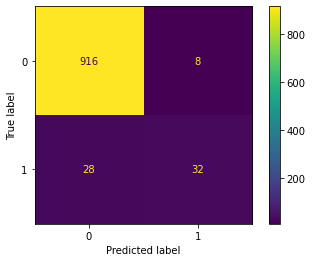

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg1, X_train_scaled, y_train)

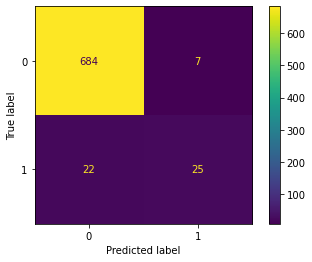

In [49]:
plot_confusion_matrix(logreg1, X_val_scaled, y_tr_val)

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2021)

In [51]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [52]:
logreg2 = LogisticRegression()

In [53]:
modeling_function(logreg1, X_train_res, y_train_res, X_val_scaled, y_tr_val)

Training accuracy:  0.8923160173160173
Validation accuracy:  0.8875338753387534


LogisticRegression()

In [54]:
rf = RandomForestClassifier(random_state=2021)

In [55]:
modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_tr_val)


Training accuracy:  1.0
Validation accuracy:  1.0


RandomForestClassifier(random_state=2021)

In [56]:
param_grid = {'n_estimators': [50, 75, 100],
              'max_depth': [20, 50, 75],
              'min_samples_leaf': [5, 10, 15],
              'criterion': ['gini', 'entropy'],
              'max_leaf_nodes': [5, 10, 15, 20],
              'n_jobs': [-1]}

In [57]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [58]:
rf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 50, 75],
                         'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [50, 75, 100], 'n_jobs': [-1]},
             scoring='accuracy')

In [59]:
rf_model = rf_gs.best_estimator_

In [60]:
modeling_function(rf_model, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy:  0.959349593495935
Validation accuracy:  0.9566395663956639


RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=10,
                       min_samples_leaf=15, n_jobs=-1, random_state=2021)

In [61]:
rf2 = RandomForestClassifier(criterion='entropy', random_state=2021)

In [62]:
param_grid2 = {'max_depth': [10, 15, 20, 25, 30],
              'min_samples_leaf': [15, 20, 25],
              'max_leaf_nodes': [8, 9, 10, 11, 12],
              'n_jobs': [-1]}

In [63]:
rf2_gs = GridSearchCV(estimator=rf2, param_grid=param_grid2, scoring='accuracy')

In [64]:
rf2_gs.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=2021),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'max_leaf_nodes': [8, 9, 10, 11, 12],
                         'min_samples_leaf': [15, 20, 25], 'n_jobs': [-1]},
             scoring='accuracy')

In [65]:

best_rf_model = rf2_gs.best_estimator_

In [66]:
modeling_function(best_rf_model, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy:  0.9573170731707317
Validation accuracy:  0.9539295392953929


RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8,
                       min_samples_leaf=15, n_jobs=-1, random_state=2021)

In [67]:
hall_of_fame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1968 entries, A.C. Green to Zydrunas Ilgauskas
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_points              1968 non-null   float64
 1   total_personal_fouls      1968 non-null   float64
 2   total_turnovers           1968 non-null   float64
 3   total_blocks              1968 non-null   float64
 4   total_steals              1968 non-null   float64
 5   total_assists             1968 non-null   float64
 6   total_rebounds            1968 non-null   float64
 7   defensive_rebounds        1968 non-null   float64
 8   offensive_rebounds        1968 non-null   float64
 9   ft_percentage             1968 non-null   float64
 10  free_throws_made          1968 non-null   float64
 11  2p_percentage             1968 non-null   float64
 12  2p_made                   1968 non-null   float64
 13  3p_percentage             1519 non-null   flo

In [68]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [69]:
URL = 'https://www.basketball-reference.com/awards/hof.html'

req = requests.get(URL)
soup = bs(req.content, 'html.parser')

table = soup.find('table').prettify()
hof_df = pd.read_html(table, flavor = 'bs4')[0]

hof_df.head()

Unnamed: 0_level_0                              Unnamed: 1_level_0  \
                Year                                            Name   
0               2021                                    Val Ackerman   
1               2021  Rick Adelman  Player  /  Coach  /  CBB  player   
2               2021              Chris Bosh  Player  /  CBB  player   
3               2021                           Bob Dandridge  Player   
4               2021       Cotton Fitzsimmons  Coach  /  CBB  player   

  Unnamed: 2_level_0 Unnamed: 3_level_0 Per Game                     Shooting  \
            Category                  G      PTS  TRB  AST  STL  BLK      FG%   
0        Contributor                NaN      NaN  NaN  NaN  NaN  NaN      NaN   
1              Coach                NaN      NaN  NaN  NaN  NaN  NaN      NaN   
2             Player                893     19.2  8.5  2.0  0.8  1.0     .494   
3             Player                839     18.5  6.8  3.4  1.3  0.6     .484   
4        Contributor                NaN      NaN  NaN  NaN  NaN  NaN      NaN   

              Advanced       Unnamed: 14_level_0 Coaching                   
    3P%   FT%       WS WS/48 Unnamed: 14_level_1        G     W    L  W/L%  
0   NaN   NaN      NaN   NaN                 NaN      NaN   NaN  NaN   NaN  
1   NaN   NaN      NaN   NaN                 NaN     1791  1042  749  .582  
2  .335  .799    106.0  .159                 NaN      NaN   NaN  NaN   NaN  
3  .167  .780     80.3  .131                 NaN      NaN   NaN  NaN   NaN  
4   NaN   NaN      NaN   NaN                 NaN      NaN   NaN  NaN   NaN

In [70]:
hof_df.columns = hof_df.columns.droplevel()

# The table also contains non-player data, this isn't helpful to us
for idx, row in hof_df.iterrows():
   if row.Category != 'Player':
       hof_df = hof_df.drop([idx])

# Drop WNBA players since we're only studying NBA
for idx, row in hof_df.iterrows():
    if 'WNBA' in row.Name:
        hof_df = hof_df.drop(idx)

# The Name category has some extra stuff, lets drop it to only <firstName lastName> 
# NOTE: we could just do this w a one-line lambda but we have some special cases with nicknames 
def fix_name(name):
    name_list = name.split()
    if len(name_list) == 2:     # if name is already in the right format
        return name
    new_name = ''
    for word in name_list:
        if word == 'Player':
            break
        new_name += word + ' '
    return new_name[:-1]     

hof_df['Name'] = hof_df['Name'].apply(lambda x: fix_name(x))

# Drop unnecessary cols:
hof_df = hof_df.drop(columns=['Unnamed: 14_level_1', 'G', 'W', 'L', 'W/L%'], axis=1)

hof_df = hof_df.sort_values(by=['Year'])

# Some non-NBA players are still in the Hall of Fame data frame
# Drop rows of the df that have PTS listed as NaN. This will remove all non-NBA players
hof_df = hof_df.dropna(subset=['PTS'])

# Cast the numbers in the main categories into floating points from strings (to prep data for analysis)
hof_df["Year"] = pd.to_numeric(pd.Series(hof_df["Year"])) 
hof_df["PTS"] = pd.to_numeric(pd.Series(hof_df["PTS"])) 
hof_df["TRB"] = pd.to_numeric(pd.Series(hof_df["TRB"])) 
hof_df["AST"] = pd.to_numeric(pd.Series(hof_df["AST"])) 
hof_df["BLK"] = pd.to_numeric(pd.Series(hof_df["BLK"])) 
hof_df["STL"] = pd.to_numeric(pd.Series(hof_df["STL"]))

In [71]:
hof_df.head()

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
547,1959,George Mikan,Player,23.1,13.4,2.8,NaN,NaN,.404,NaN,.782,108.7,.249
530,1960,Ed Macauley,Player,17.5,7.5,3.2,NaN,NaN,.436,NaN,.761,100.4,.196
513,1961,Andy Phillip,Player,9.1,4.4,5.4,NaN,NaN,.368,NaN,.695,60.8,.101
458,1970,Bob Davies,Player,14.3,2.9,4.9,NaN,NaN,.378,NaN,.759,49.7,.148
452,1971,Bob Cousy,Player,18.4,5.2,7.5,NaN,NaN,.375,NaN,.803,91.1,.139


In [72]:
hall_of_fame['points/game'] = hall_of_fame['total_points']/hall_of_fame['games_played']

In [73]:
hall_of_fame['fouls/game'] = hall_of_fame['total_personal_fouls']/hall_of_fame['games_played']

In [74]:
hall_of_fame['blocks/game'] = hall_of_fame['total_blocks']/hall_of_fame['games_played']

In [75]:
hall_of_fame['turnovers/game'] = hall_of_fame['total_turnovers']/hall_of_fame['games_played']

In [76]:
hall_of_fame['rebounds/gamesteals/game'] = hall_of_fame['total_steals']/hall_of_fame['games_played']

In [77]:
hall_of_fame['assists/game'] = hall_of_fame['total_assists']/hall_of_fame['games_played']

In [78]:
hall_of_fame['rebounds/game'] = hall_of_fame['total_rebounds']/hall_of_fame['games_played']

In [79]:
hall_of_fame['steals/game'] = hall_of_fame['total_steals']/hall_of_fame['games_played']

In [80]:
curr_points = np.mean(hall_of_fame["points/game"])
curr_assists = np.mean(hall_of_fame["assists/game"])
curr_rebounds = np.mean(hall_of_fame["rebounds/game"])
curr_blocks = np.mean(hall_of_fame["blocks/game"])
curr_steals = np.mean(hall_of_fame["steals/game"])

# build a footprint of the average hall of famer by finding the mean in the same fashion as above
hof_points = np.mean(hof_df["PTS"])
hof_assists = np.mean(hof_df["AST"])
hof_rebounds = np.mean(hof_df["TRB"])
hof_blocks = np.mean(hof_df["BLK"])
hof_steals = np.mean(hof_df["STL"])

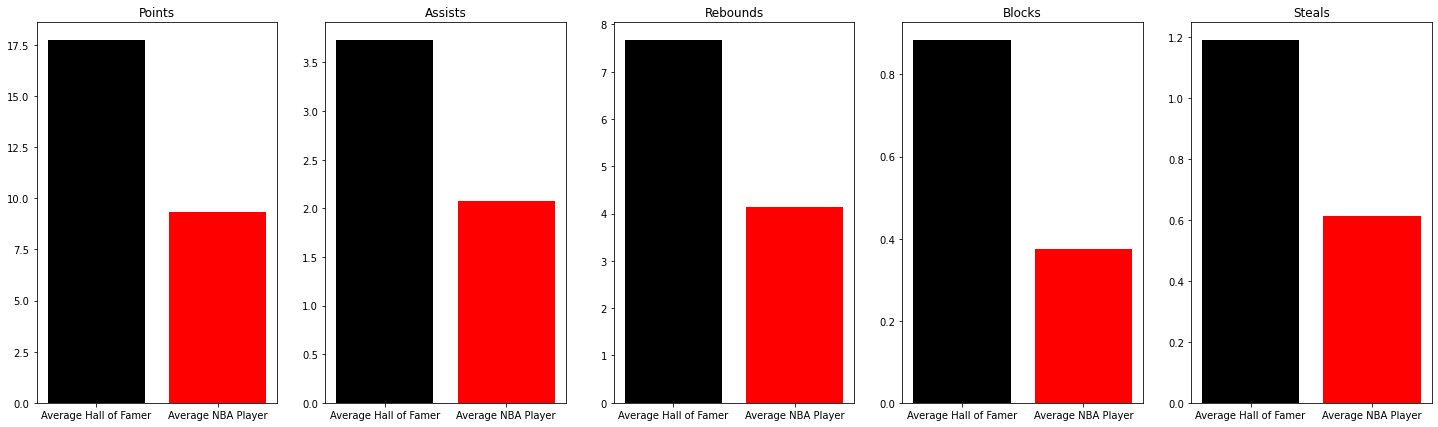

In [119]:

plt.figure(figsize=(25, 7))

colors = ['black', 'red']

plt.subplot(1, 5,1)
plt.bar(["Average Hall of Famer","Average NBA Player"], [hof_points, curr_points],color=colors)
plt.title("Points")

plt.subplot(1, 5,2)
plt.bar(["Average Hall of Famer", "Average NBA Player"], [hof_assists, curr_assists],color=colors)
plt.title("Assists")

plt.subplot(1, 5, 3)
plt.bar(["Average Hall of Famer", "Average NBA Player"], [hof_rebounds, curr_rebounds],color=colors)
plt.title("Rebounds")

plt.subplot(1, 5, 4)
plt.bar(["Average Hall of Famer", "Average NBA Player"], [hof_blocks, curr_blocks],color=colors)
plt.title("Blocks")

plt.subplot(1, 5, 5)
plt.bar(["Average Hall of Famer", "Average NBA Player"], [hof_steals,curr_steals],color=colors)
plt.title("Steals")
plt.savefig('hall_of_fame_vs_average.png')

In [82]:
def get_player_stats(hof_df, player_name):
    for i, row in hof_df.iterrows():
        if row['Name'] == player_name:
            return [float(row['PTS']), float(row['TRB']), float(row['AST']), float(row['STL']), float(row['BLK'])]

In [83]:
def calc_category_average(hof_df, category):
    player_category_stat = [float(stat) for stat in hof_df[category]]
    player_category_stat = list(filter(lambda x: np.isnan(x) == False , player_category_stat))
    avg_stat = sum(player_category_stat) / float(len(player_category_stat))
    return avg_stat

avg_pts = calc_category_average(hof_df, 'PTS')
avg_trb = calc_category_average(hof_df, 'TRB')
avg_ast = calc_category_average(hof_df, 'AST')
avg_stl = calc_category_average(hof_df, 'STL')
avg_blk = calc_category_average(hof_df, 'BLK')

avg_stats = [avg_pts, avg_trb, avg_ast, avg_stl, avg_blk]

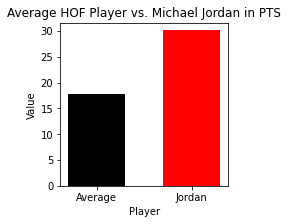

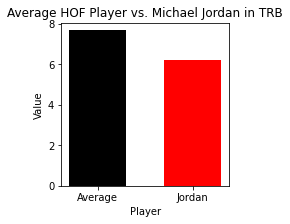

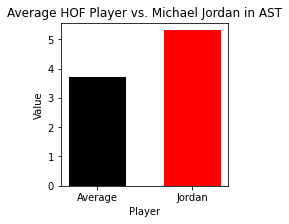

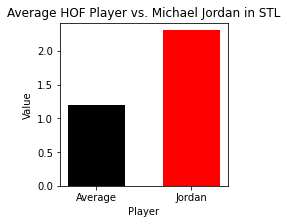

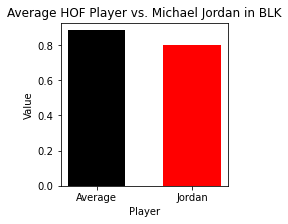

<Figure size 432x288 with 0 Axes>

In [105]:
jordan_stats = get_player_stats(hof_df, 'Michael Jordan')
categories = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

for i in range(len(categories)):
    fig = plt.figure(figsize=(3, 3))
    plt.bar(['Average', 'Jordan'], [avg_stats[i], jordan_stats[i]], color =['black', 'red'],width = 0.6)
    
    plt.xlabel("Player")
    plt.ylabel("Value")
    plt.title("Average HOF Player vs. Michael Jordan in " + str(categories[i]))
    plt.show()
    
plt.savefig('jordan.png')

In [85]:
hall_of_fame

,total_points,total_personal_fouls,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,...,team,HOF,points/game,fouls/game,blocks/game,turnovers/game,rebounds/gamesteals/game,assists/game,rebounds/game,steals/game
player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,12928.0,2581.0,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,...,FTW,0,9.498898,1.896400,0.412932,1.108009,0.810434,1.079353,7.442322,0.810434
A.J. Price,1656.0,252.0,243.0,9.0,132.0,613.0,409.0,335.0,74.0,0.632250,...,NYK,0,5.770035,0.878049,0.031359,0.846690,0.459930,2.135889,1.425087,0.459930
Aaron Brooks,7839.0,1544.0,1272.0,113.0,469.0,2485.0,1360.0,1037.0,323.0,0.838000,...,TOT,0,9.835634,1.937265,0.141782,1.595985,0.588457,3.117942,1.706399,0.588457
Aaron Gordon,1981.0,408.0,193.0,117.0,144.0,311.0,1081.0,765.0,316.0,0.702667,...,FTW,0,9.663415,1.990244,0.570732,0.941463,0.702439,1.517073,5.273171,0.702439
Aaron Gray,1235.0,796.0,314.0,106.0,113.0,251.0,1407.0,889.0,518.0,0.560000,...,AND,0,3.191214,2.056848,0.273902,0.811370,0.291990,0.648579,3.635659,0.291990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,6774.0,2465.0,1316.0,344.0,699.0,1233.0,5729.0,3555.0,2174.0,0.743429,...,BOS,0,7.048907,2.565036,0.357960,1.369407,0.727367,1.283039,5.961498,0.727367
Zeke Zawoluk,1210.0,450.0,0.0,0.0,0.0,217.0,732.0,0.0,0.0,0.750667,...,CLE,0,6.759777,2.513966,0.000000,0.000000,0.000000,1.212291,4.089385,0.000000
Zeljko Rebraca,1367.0,564.0,220.0,171.0,62.0,94.0,746.0,527.0,219.0,0.747286,...,SEA,0,5.719665,2.359833,0.715481,0.920502,0.259414,0.393305,3.121339,0.259414


In [86]:
def get_player_stats_v2(hall_of_fame, player_name):
    for i, row in hall_of_fame.iterrows():
        if hall_of_fame.index == player_name:
            return [float(row['points/game']), float(row['rebounds/game']), float(row['assists/game'])]

In [87]:
zaza = hall_of_fame[hall_of_fame.index == "Zaza Pachulia"]

In [88]:
zaza_stats = get_player_stats_v2(zaza, "Zaza Pachulia")
print(zaza_stats)

[7.048907388137357, 5.9614984391259105, 1.283038501560874]


Text(0.5, 1.0, 'Assists')

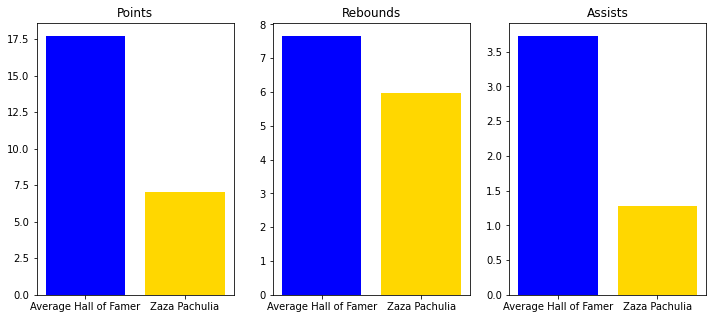

In [89]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3,1)
plt.bar(["Average Hall of Famer","Zaza Pachulia"], [hof_points, zaza_stats[0]],color=colors)
plt.title("Points")

plt.subplot(1, 3, 2)
plt.bar(["Average Hall of Famer","Zaza Pachulia"], [hof_rebounds, zaza_stats[1]],color=colors)
plt.title("Rebounds")

plt.subplot(1, 3, 3)
plt.bar(["Average Hall of Famer","Zaza Pachulia"], [hof_assists, zaza_stats[2]],color=colors)
plt.title("Assists")



In [90]:
ac = hall_of_fame[hall_of_fame.index == "A.C. Green"]

In [91]:
ac_stats = get_player_stats_v2(ac, "A.C. Green")
print(ac_stats)

[9.498897869213813, 7.442321822189567, 1.0793534166054373]


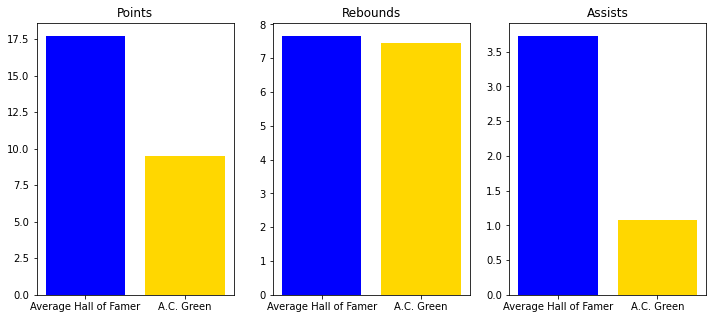

In [104]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3,1)
plt.bar(["Average Hall of Famer","A.C. Green"], [hof_points, ac_stats[0]],color=colors)
plt.title("Points")

plt.subplot(1, 3, 2)
plt.bar(["Average Hall of Famer","A.C. Green"], [hof_rebounds, ac_stats[1]],color=colors)
plt.title("Rebounds")

plt.subplot(1, 3, 3)
plt.bar(["Average Hall of Famer","A.C. Green"], [hof_assists, ac_stats[2]],color=colors)
plt.title("Assists")
plt.savefig('steph.png')

In [93]:
curry = hall_of_fame[hall_of_fame.index == "Stephen Curry"]

In [94]:
curry_stats = get_player_stats_v2(curry, "Stephen Curry")
print(curry_stats)

[22.801393728222997, 4.358885017421603, 6.822299651567945]


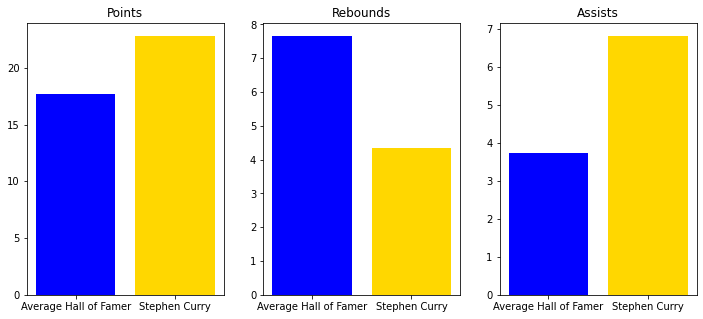

In [109]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3,1)
plt.bar(["Average Hall of Famer","Stephen Curry"], [hof_points, curry_stats[0]],color=colors)
plt.title("Points")

plt.subplot(1, 3, 2)
plt.bar(["Average Hall of Famer","Stephen Curry"], [hof_rebounds, curry_stats[1]],color=colors)
plt.title("Rebounds")

plt.subplot(1, 3, 3)
plt.bar(["Average Hall of Famer","Stephen Curry"], [hof_assists, curry_stats[2]],color=colors)
plt.title("Assists")
plt.savefig('steph.png')

In [107]:
jordan = hall_of_fame[hall_of_fame.index == "Michael Jordan*"]

In [113]:
jordan_stats = get_player_stats(hof_df, 'Michael Jordan')
jordan_stats

[30.1, 6.2, 5.3, 2.3, 0.8]

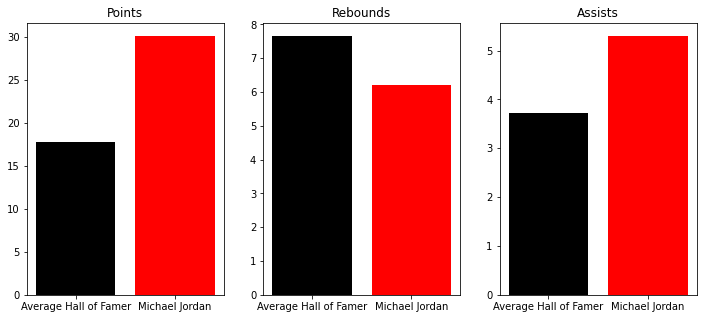

In [120]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3,1)
plt.bar(["Average Hall of Famer","Michael Jordan"], [hof_points, jordan_stats[0]],color=colors)
plt.title("Points")

plt.subplot(1, 3, 2)
plt.bar(["Average Hall of Famer","Michael Jordan"], [hof_rebounds, jordan_stats[1]],color=colors)
plt.title("Rebounds")

plt.subplot(1, 3, 3)
plt.bar(["Average Hall of Famer","Michael Jordan"], [hof_assists, jordan_stats[2]],color=colors)
plt.title("Assists")
plt.savefig('jordan.png')

IndexError: list index out of range

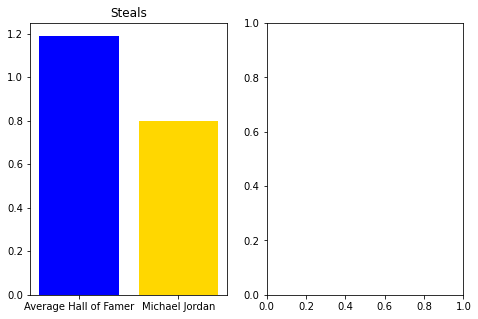

In [115]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3,1)
plt.bar(["Average Hall of Famer","Michael Jordan"], [hof_steals, jordan_stats[4]],color=colors)
plt.title("Steals")

plt.subplot(1, 3, 2)
plt.bar(["Average Hall of Famer","Michael Jordan"], [hof_blocks, jordan_stats[5]],color=colors)
plt.title("Blocks")

In [96]:
hall_of_fame.isnull().sum()

total_points                  0
total_personal_fouls          0
total_turnovers               0
total_blocks                  0
total_steals                  0
total_assists                 0
total_rebounds                0
defensive_rebounds            0
offensive_rebounds            0
ft_percentage                 0
free_throws_made              0
2p_percentage                 0
2p_made                       0
3p_percentage               449
3p_made                       0
fg_percent                    0
field_goals                   0
shooting_percent              0
player_efficiency_rating      6
games_played                  0
seasons                       0
position                     13
team                         13
HOF                           0
points/game                   0
fouls/game                    0
blocks/game                   0
turnovers/game                0
rebounds/gamesteals/game      0
assists/game                  0
rebounds/game                 0
steals/g

In [97]:
X_test.isna().sum()

total_points                  0
total_personal_fouls          0
total_turnovers               0
total_blocks                  0
total_steals                  0
total_assists                 0
total_rebounds                0
defensive_rebounds            0
offensive_rebounds            0
ft_percentage                 0
free_throws_made              0
2p_percentage                 0
2p_made                       0
3p_percentage               236
3p_made                       0
fg_percent                    0
field_goals                   0
shooting_percent              0
player_efficiency_rating      3
games_played                  0
seasons                       0
dtype: int64

In [98]:
X_test.dropna(subset=['3p_percentage'], inplace=True)

<ipython-input-98-6cff07cb7e98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.dropna(subset=['3p_percentage'], inplace=True)


In [99]:
pred_proba = rf.predict_proba(X_test)
pred_proba

array([[0.43, 0.57],
       [0.48, 0.52],
       [0.47, 0.53],
       ...,
       [0.47, 0.53],
       [0.48, 0.52],
       [0.47, 0.53]])

In [100]:
y_pred_proba = []
for i in enumerate(pred_proba):
    y_pred_proba.append(i[1][1])
y_pred_proba = np.asarray(y_pred_proba)

In [101]:
y_pred_proba


array([0.57, 0.52, 0.53, 0.51, 0.53, 0.51, 0.53, 0.52, 0.58, 0.52, 0.53,
       0.52, 0.55, 0.52, 0.53, 0.56, 0.53, 0.56, 0.52, 0.53, 0.51, 0.52,
       0.52, 0.57, 0.57, 0.53, 0.53, 0.58, 0.52, 0.58, 0.52, 0.58, 0.53,
       0.52, 0.52, 0.52, 0.52, 0.55, 0.53, 0.52, 0.52, 0.58, 0.52, 0.58,
       0.52, 0.53, 0.51, 0.56, 0.58, 0.52, 0.53, 0.53, 0.53, 0.51, 0.56,
       0.51, 0.52, 0.58, 0.52, 0.52, 0.56, 0.52, 0.58, 0.51, 0.52, 0.52,
       0.51, 0.53, 0.51, 0.56, 0.53, 0.52, 0.53, 0.53, 0.52, 0.52, 0.52,
       0.58, 0.57, 0.51, 0.52, 0.58, 0.53, 0.58, 0.57, 0.52, 0.58, 0.53,
       0.57, 0.59, 0.51, 0.53, 0.53, 0.52, 0.58, 0.51, 0.58, 0.53, 0.52,
       0.54, 0.52, 0.53, 0.56, 0.52, 0.56, 0.52, 0.52, 0.52, 0.57, 0.52,
       0.52, 0.52, 0.52, 0.58, 0.52, 0.52, 0.52, 0.58, 0.52, 0.56, 0.58,
       0.52, 0.52, 0.52, 0.52, 0.57, 0.52, 0.53, 0.53, 0.52, 0.53, 0.52,
       0.57, 0.58, 0.53, 0.53, 0.52, 0.51, 0.52, 0.51, 0.52, 0.52, 0.56,
       0.51, 0.53, 0.53, 0.58, 0.53, 0.58, 0.52, 0.

In [102]:
test = hall_of_fame

In [103]:
results_hof = pd.DataFrame({
    "player": test["player"],
    "HOF": y_pred_proba
    })

KeyError: 'player'